<a href="https://colab.research.google.com/github/Tonge-Shim/1/blob/master/1970052_%EC%8B%AC%EC%B1%84%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# generating training dataset


In [4]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()


Saving Train_Data.txt to Train_Data.txt


Saving Test_Data.txt to Test_Data.txt


In [6]:
# use panda and io pachage to load txt. 
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_train)
#replace missing value ? with 0


selecting features

In [7]:
X=df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
y = df_train['class'].replace({2:0, 4:1})


#1. selectkbest

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 10 best features

  Specs        Score
5    x6  1221.403569
1    x2   863.356466
2    x3   837.828128
7    x8   745.776302
3    x4   606.855977
0    x1   527.381572
6    x7   380.346755
4    x5   355.923564
8    x9   186.546032


#2. feature importance

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

[0.14586791 0.15963551 0.1514542  0.05433612 0.05337252 0.25907148
 0.06638362 0.09845075 0.01142789]


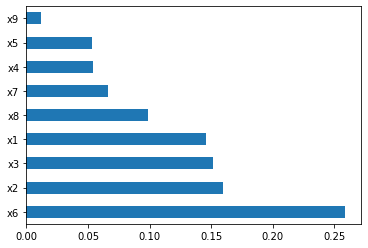

In [23]:
modelfi = ExtraTreesClassifier( )
modelfi.fit(X,y)
print(modelfi.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelfi.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

consequently, it seems that x6, x2, x3 are the most important features.

In [24]:
x_train = torch.Tensor(df_train[['x2', 'x3','x6',  'x1']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(df_train['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_train)

# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [164]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 6]
print(list(model.parameters()))



[Parameter containing:
tensor([[ 0.2576, -0.2207, -0.0969,  0.2347]], requires_grad=True), Parameter containing:
tensor([-0.4707], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [120]:
[w, b] = model.parameters()#계수, 절편
#print(w) 
w1, w2, w3, w4= w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(), b[0].item())

# training the model 

In [165]:
# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9 )#여기서 l2파라미터 조정 가능/weight-decay


# training the model 
epochs = 300
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculrate loss 
  loss = criterion(y_pred, y_train)
  #L1 parameter
  [w,b] = model.parameters()
  w1, w2, w3, w4= w.view(x_train.shape[1])
  lbd=0.11
  L1_reg = lbd * (abs(w1) + abs(w2) + abs(w3)+abs(w4))#/(2*len(x_train)) 
  #L1_reg = 0
  loss = loss + L1_reg

  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:  0 loss:  0.7361681461334229
epoch:  1 loss:  0.7172554135322571
epoch:  2 loss:  0.6897469162940979
epoch:  3 loss:  0.6601657271385193
epoch:  4 loss:  0.6323212385177612
epoch:  5 loss:  0.6032305359840393
epoch:  6 loss:  0.5703475475311279
epoch:  7 loss:  0.5393533110618591
epoch:  8 loss:  0.5207826495170593
epoch:  9 loss:  0.5140823721885681
epoch:  10 loss:  0.5065715312957764
epoch:  11 loss:  0.49633947014808655
epoch:  12 loss:  0.4924969971179962
epoch:  13 loss:  0.491962194442749
epoch:  14 loss:  0.492673397064209
epoch:  15 loss:  0.4929535388946533
epoch:  16 loss:  0.4917003810405731
epoch:  17 loss:  0.48876863718032837
epoch:  18 loss:  0.4847172200679779
epoch:  19 loss:  0.48027586936950684
epoch:  20 loss:  0.4758409857749939
epoch:  21 loss:  0.4712732136249542
epoch:  22 loss:  0.4661148190498352
epoch:  23 loss:  0.4600560963153839
epoch:  24 loss:  0.45324045419692993
epoch:  25 loss:  0.44615668058395386
epoch:  26 loss:  0.4392642378807068
epoch:  

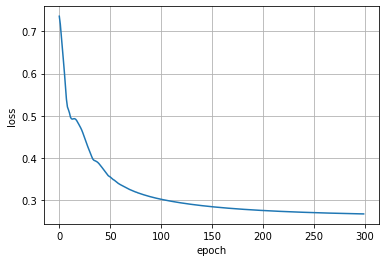

In [166]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


# model evalation with new datasets the model has never seen before

In [129]:
# use panda and io pachage to load txt. 
df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_test)
#replace missing value ? with 0
x_test = torch.Tensor(df_test[[ 'x2', 'x3', 'x6', 'x1']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(df_test['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_test)

In [167]:
#model test w/ all test datasets
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 94.19999999999999%
Predcition accuracy_test= 98.99497487437185%


[x1, x2, x3, x6]==> 97%accuracy: best <br>
[x8, x2, x3, x6]==> 95%accuracy <br>
[x8, x2, x3, x6, x1]==> 76%accuracy ...ㅎㅎ